# 2D Neural Style Transfer

This is the Jupyter Notebook for 2D NST.

## Step 0: imports

In [12]:
import sys
import torch
import matplotlib.pyplot as plt

# install KeOps kernels
!pip install -q pykeops==1.4.1 # > install.log

# install pytorch version of np.Interp, which is used for histogram loss
!pip install -q git+https://github.com/aliutkus/torchinterp1d.git

# Please run the following two lines DEPENDENTLY! (depends on whether the notebook is run locally or on Colab)
!git clone https://github.com/wmd0701/MA.git NST
%cd NST

# import self-defined functions
from utils.data_loader import image_loader, image_unloader
from utils.pipeline import pipeline_2D_NST
from utils.plot import plot_statistics, plot_statistics_difference, plot_gram_matrix

# better plot
%pylab inline

Cloning into 'NST'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 89 (delta 20), reused 79 (delta 12), pack-reused 0
Unpacking objects: 100% (89/89), done.
/content/NST/NST
Populating the interactive namespace from numpy and matplotlib


## Step 1: set up configs

In [48]:
# common settings for all configs
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1']
style_weights = [1e6/n**2 for n in [64,128,256,512]]
content_img = image_loader("./image_content/sil_cow_grayscale.png", imsize=(256,256))
content_layers = ['conv4_2']
content_weights = [1]
need_content = False
mask_img = None
masking = False
mask_pooling = 'avg'
model_pooling = 'max'
n_iters = 200
learning_rate = 1

# types of style losses to be considered
style_loss_types = {#'gram':1,
                    'bnst':1,               #'morest':1e-1, 'histo':1, 'linear':1, 'poly':1, 'rbf':1e2,
                    }

# configs
configs = [# config 0
           {'image_path':'blue_swirls.jpg', 'imsize':256, 'tiling':1, 
            'fft_level':-1, 'freq_lower':None, 'freq_upper':None,
            },
           
           # config 1
           {'image_path':'blue_swirls.jpg', 'imsize':256, 'tiling':1, 
            'fft_level':0, 'freq_lower':None, 'freq_upper':0.1
            },
           
           ]

## Step 2: run NST pipeline

In [49]:
# dictionaries and lists
means = {config_idx : {} for config_idx in range(len(configs))}
stds  = {config_idx : {} for config_idx in range(len(configs))}
grams = {config_idx : {} for config_idx in range(len(configs))}
output_imgs = []

config_idx = 0
for config in configs:
    # read params from config
    image_path = config.get('image_path', 'starry_night.jpg')
    imsize = config.get('imsize', None)
    tiling = config.get('tiling', 1)
    fft_level = config.get('fft_level', -1)
    freq_lower = config.get('freq_lower', None)
    freq_upper = config.get('freq_upper', None)
    
    # images
    style_img = image_loader("./image_style/"+image_path, imsize=imsize, tiling=tiling, fft_level=fft_level, freq_lower=freq_lower, freq_upper=freq_upper)
    input_img = torch.rand((1,3,256,256), device=style_img.device)

    output_img, loss_history, style_losses = pipeline_2D_NST( style_img = style_img, 
                                                              content_img = content_img,
                                                              input_img = input_img,
                                                              mask_img = mask_img,
                                                              n_iters = n_iters,
                                                              style_weights = style_weights,
                                                              content_weights = content_weights,
                                                              style_layers = style_layers,
                                                              content_layers = content_layers,
                                                              style_loss_types = style_loss_types,
                                                              learning_rate = learning_rate,
                                                              need_content = need_content,
                                                              masking = masking,
                                                              model_pooling = model_pooling,
                                                              mask_pooling = mask_pooling,
                                                              silent = True,
                                                              fft_level=fft_level,
                                                              freq_lower=freq_lower,
                                                              freq_upper=freq_upper)

    # add output image
    output_imgs.append(image_unloader(output_img))                          

    # add statistics
    for style_layer_idx in range(len(style_layers)):
        style_layer_str = style_layers[style_layer_idx]
        if 'gram' in style_loss_types:
            grams[config_idx][style_layer_str] = style_losses[style_layer_idx].target_gram_matrix.detach().cpu()
        if 'bnst' in style_loss_types:
            means[config_idx][style_layer_str] = style_losses[style_layer_idx].target_mean.detach().cpu()
            stds[config_idx] [style_layer_str] = style_losses[style_layer_idx].target_std.detach().cpu()
        
    config_idx += 1

run [20]:
run [40]:
run [60]:
run [80]:
run [100]:
run [120]:
run [140]:
run [160]:
run [180]:
run [200]:
run [220]:
run [20]:
run [40]:
run [60]:
run [80]:
run [100]:
run [120]:
run [140]:
run [160]:
run [180]:
run [200]:
run [220]:


## Step 3: plots

### Plot style reconstructions

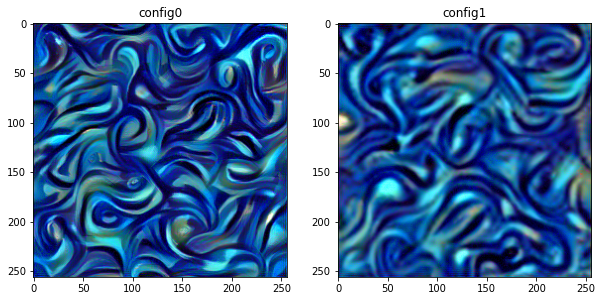

In [50]:
plt.figure(figsize=(5*len(output_imgs), 5))
for i in range(len(output_imgs)):
    plt.subplot(1, len(output_imgs), i+1)
    plt.imshow(output_imgs[i])
    plt.title('config' + str(i))

### Plot BN mean / std

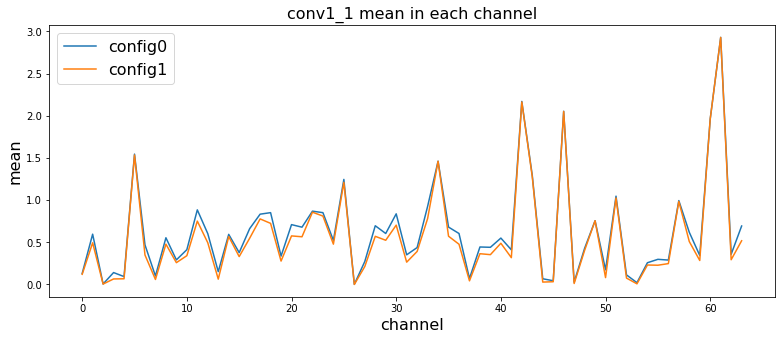

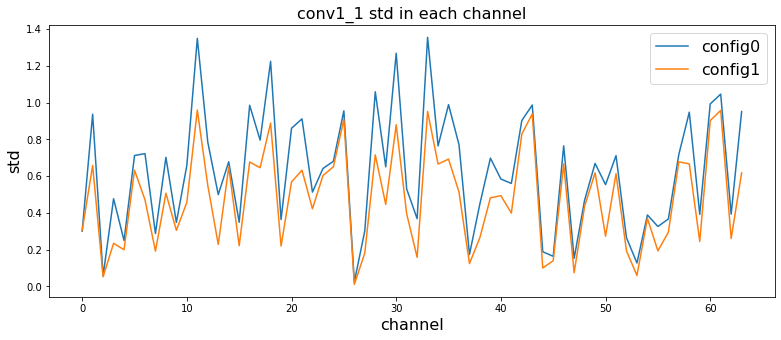

In [51]:
if 'bnst' in style_loss_types:
    plot_statistics(means, config_idx = None, style_layer = 'conv1_1', title = 'mean')
    plot_statistics(stds,  config_idx = None, style_layer = 'conv1_1', title = 'std')

### Plot gram matrices

In [27]:
if 'gram' in style_loss_types:
    plot_gram_matrix(grams, global_normalizing = False)